ODR


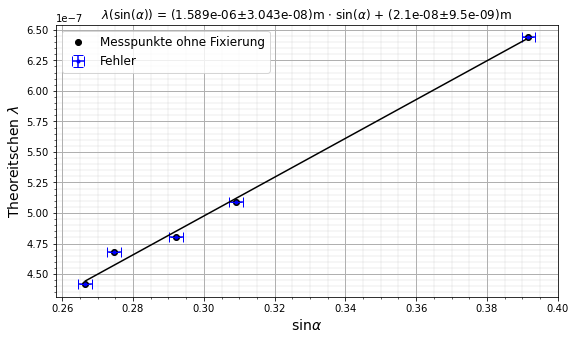

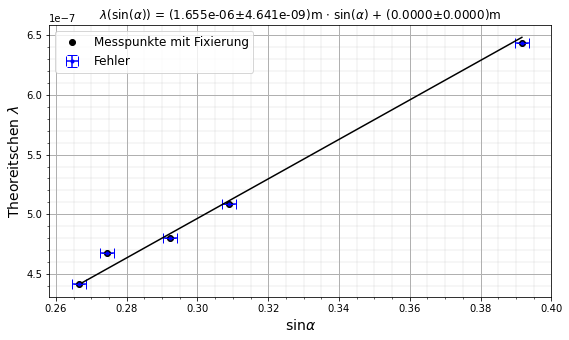

d_theo=1.6666666666666667e-06
d :1.6551712508693456e-06 +- 4.6413898403358365e-09
[603759.62115667 586812.12070727 608828.85139632 607604.57769468
 608324.84143394]


In [112]:
import matplotlib



SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14


matplotlib.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
matplotlib.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



%run ../odr_v2.ipynb
%run ../arr2table_v3.2.ipynb
#Theo:
#Violett,Blau,Grün,Hellblau,Rot
cdt=np.array([441.463,467.8136,479.9914,508.5824,643.84696])*1e-9

#error für grad und min
m_err=10
            
#linke ordung
cdlg=np.array([25,26,26,27,32])
cdlm=np.array([0,0,3,3,10])
cdl=cdlg+cdlm/60

#rechte ordung
cdrg=np.array([354,354,352,351,346])
cdrm=np.array([5,8,4,3,3])
cdr=cdrg+cdrm/60
#Justage:
cdr=(360-cdr)

cdl_err=cdr_err=m_err/60
cd=(cdl+cdr)/2
cd_err=(cdl_err)*np.sqrt(1/2)
#print(cd_err==np.sqrt((cdl_err/2)**2+(cdr_err/2)**2))

x=np.sin(np.deg2rad(cd))
x_err=np.cos(np.deg2rad(cd))*np.deg2rad(cd_err)
print("ODR")
out=zeichnen(x=x,y=cdt,scientific=[3,1],x_err=x_err,y_err=1e-30,odr=True,fix=[1,1],beta0=[1e6,10],
             fx_title=r"$\lambda(\sin(\alpha))$",x_title=r"$\sin(\alpha)$", m_unit="m",b_unit="m",
             label="Messpunkte ohne Fixierung",xlabel=r"$\sin \alpha $",  ylabel="Theoreitschen $\lambda$",
             speichername="gitter_nofix")

out=zeichnen(x=x,y=cdt,scientific=[3,0],x_err=x_err,y_err=1e-30,odr=True,fix=[1,0],beta0=[1e6,0],
             fx_title=r"$\lambda(\sin(\alpha))$",x_title=r"$\sin(\alpha)$", m_unit="m",b_unit="m",
             label="Messpunkte mit Fixierung",xlabel=r"$\sin \alpha $",  ylabel="Theoreitschen $\lambda$",
             speichername="gitter_fix")
d=out.beta[0]
d_err=out.sd_beta[0]
dt=1/600000
print("d_theo={}".format(dt))
print("d :{} +- {}".format(d,d_err))

print(np.sin(np.deg2rad(cd))/cdt)

Winkel alpha:
[14.5        15.03333333 17.01666667 23.91666667]

errechnete Wellenlängen(eigenes d) mit fehler
[414.4217845  429.31989831 484.3856516  671.01886426]
[3.49493073 3.50145729 3.52745991 3.63679747]


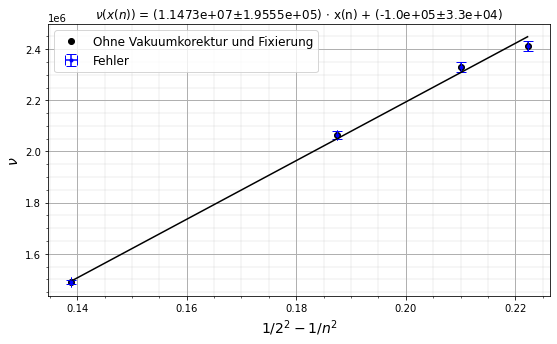

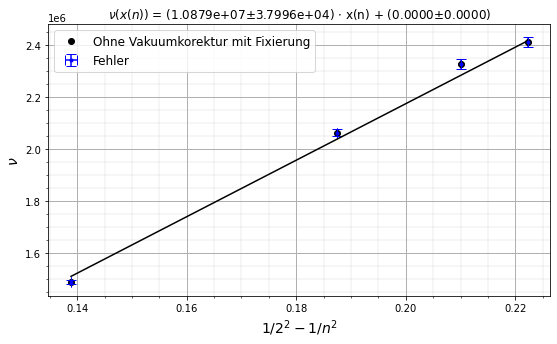

vakuum lambda (berechnetes d) mit fehler:
[414.54196682 429.44440108 484.52612344 671.21345973]
[3.49594426 3.50247271 3.52848287 3.63785214]


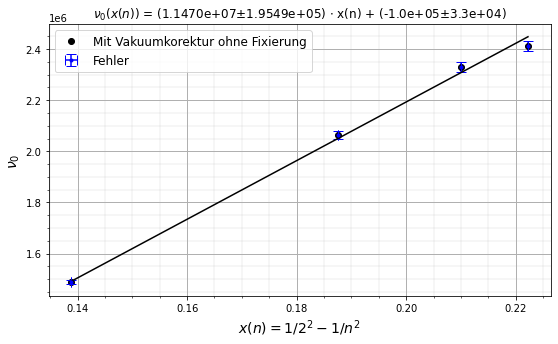

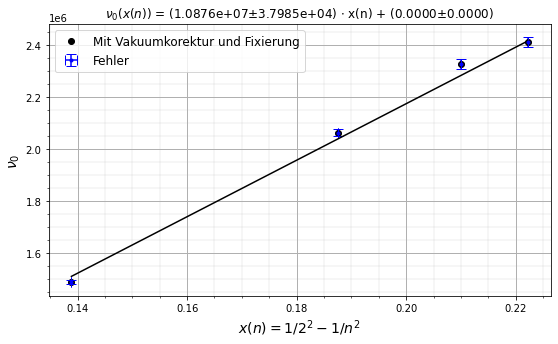


 Rydberg theo:
(7, 1.097373156816)
Abweichung von vakuum:
0.9910715041818222


In [113]:
#### Violett,Violett,Blau-Grün(Türkis),Rot
#Hδ,Hγ,Hβ,Hα
#6,5,4,3

#linke ordung
hlg=np.array([24,24,26,33])
hlm=np.array([0,5,10,0])
hl=hlg+hlm/60

#rechte ordung
hrg=np.array([355,354,352,345])
hrm=np.array([0,1,8,10])
hr=hrg+hrm/60
#Justage:
hr=(360-hr)

#Fehler vom winkel:
hl_err=hr_err=m_err/60
h_err=(hl_err)*np.sqrt(1/2)

h=(hl+hr)/2
print("Winkel alpha:")
print(h)

#Wellenlängen berechnen mit d:

hlam=d*np.sin(np.deg2rad(h))

sin_h_err=np.cos(np.deg2rad(h))*np.deg2rad(h_err)
hlam_err=np.sqrt((d_err*np.sin(np.deg2rad(h)))**2+(d*sin_h_err)**2)

print("\nerrechnete Wellenlängen(eigenes d) mit fehler")
print(hlam*1e9)
print(hlam_err*1e9)

hnu=1/hlam
hnu_err=hlam_err/hlam**2

nm=np.array([1/2**2-1/(i)**2 for i in range(6,2,-1)])

zeichnen(x=nm,y=hnu,y_err=hnu_err,scientific=[4,1],x_err=1e-30,beta0=[1e7,0],fix=[1,1],label="Ohne Vakuumkorektur und Fixierung"
         ,xlabel=r"$1/2^2-1/n^2$",  ylabel=r"$\nu$",x_title=r"x(n)",fx_title=r"$\nu(x(n))$",speichername="R_novac_nofix")

zeichnen(x=nm,y=hnu,y_err=hnu_err,scientific=[4,0],x_err=1e-30,beta0=[1e7,0],fix=[1,0],label="Ohne Vakuumkorektur mit Fixierung"
         ,xlabel=r"$1/2^2-1/n^2$",  ylabel=r"$\nu$",x_title=r"x(n)",fx_title=r"$\nu(x(n))$",speichername="R_novac_fix")


if False:
    
    #theoretisches d
    print("theoreitsches d")
    hlamt=dt*np.sin(np.deg2rad(h))
    print(hlamt*1e9)
    #Wikipedia
    print("wikipedia lambda")
    hlam_wiki=np.array([410.1735,434.045,486.132,656.278])*1e-9
    print(hlam_wiki*1e9)

print("vakuum lambda (berechnetes d) mit fehler:")
nbrechindex=(1+2.9e-4)
hlam_vac=hlam*nbrechindex
hlam_vac_err=nbrechindex*hlam_err
print(hlam_vac*1e9)
print(hlam_vac_err*1e9)
hnu_vac=1/hlam_vac
hnu_vac_err=hlam_vac_err/hlam_vac**2

ryd=zeichnen(x=nm,y=hnu_vac,y_err=hnu_vac_err,x_err=1e-30,scientific=[4,1],beta0=[1e7,0],fix=[1,1],label="Mit Vakuumkorektur ohne Fixierung"
         ,xlabel=r"$x(n)=1/2^2-1/n^2$",  ylabel=r"$\nu_0$",x_title=r"x(n)",fx_title=r"$\nu_0(x(n))$",speichername="R_vac_nofix")

ryd=zeichnen(x=nm,y=hnu_vac,y_err=hnu_vac_err,x_err=1e-30,scientific=[4,0],beta0=[1e7,0],fix=[1,0],label="Mit Vakuumkorektur und Fixierung"
         ,xlabel=r"$x(n)=1/2^2-1/n^2$",  ylabel=r"$\nu_0$",x_title=r"x(n)",fx_title=r"$\nu_0(x(n))$",speichername="R_vac_fix")
print("\n Rydberg theo:")
print(split(cons.Rydberg))
print("Abweichung von vakuum:")
print(ryd.beta[0]/cons.Rydberg)

[1 2 3 4 5 6]
[4.70230361e-07 5.10020976e-07 5.40848439e-07 5.66039790e-07
 5.92882698e-07 6.20441139e-07]
[3.52145000e-09 3.54151083e-09 3.55808647e-09 3.57229209e-09
 3.58807425e-09 3.60496063e-09]


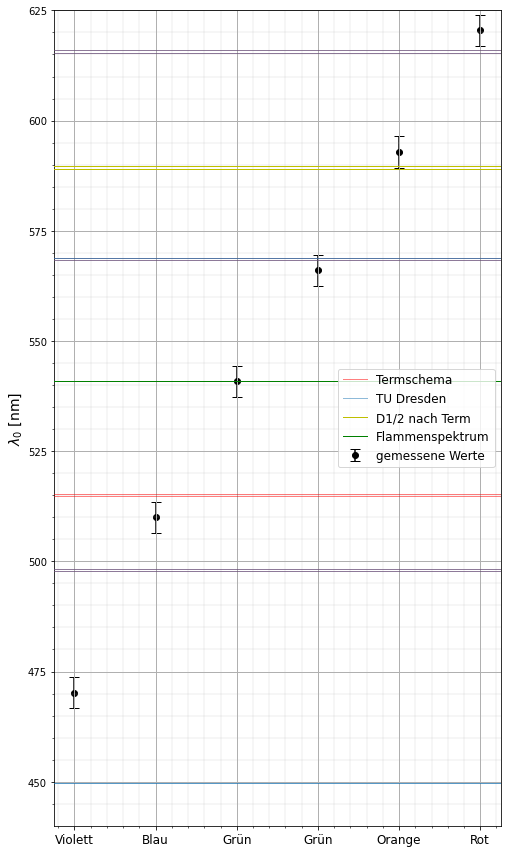

In [114]:

nlg=np.array([26,27,29,29,30,31])
nlm=np.array([0,3,8,1,4,5])
nl=nlg+nlm/60

#rechte ordung
nrg=np.array([353,351,351,349,348,347])
nrm=np.array([0,10,0,2,6,4])
nr=nrg+nrm/60
#Justage:
nr=(360-nr)

#Fehler
nl_err=nr_err=m_err/60
n=(nl+nr)/2
n_err=(nl_err)*np.sqrt(1/2)

#Wellenlängen berechnen mit d:

nlam=d*np.sin(np.deg2rad(n))

sin_n_err=np.cos(np.deg2rad(n))*np.deg2rad(n_err)
nlam_err=np.sqrt((d_err*np.sin(np.deg2rad(n)))**2+(d*sin_n_err)**2)

#Vakuum
nbrechindex=(1+2.9e-4)
nlam_vac=nlam*nbrechindex
nlam_vac_err=nbrechindex*nlam_err


xn=np.arange(1,len(nlam_vac)+1,1)
print(xn)
print(nlam_vac)
print(nlam_vac_err)

term_dick_sichtbar=np.array([588.9963,589.593,616.073,568.882,568.267])
term_dunn_sichtbar=np.array([285.283,330.234,285.302,330.204,615.427,515.365,514.909,498.287,497.861])
tud=np.array([449.8,568.9,497.9,498.3,568.3,568.8,589.0,589.6,615.4,616.1])



ntheo=nlam_vac
fig, ax = plt.subplots(1,1,figsize=(8,15)) 

ax.errorbar(xn,nlam_vac*10**9,yerr=nlam_vac_err*10**9,fmt="o" , color="k", label="gemessene Werte",capsize=5,zorder=1)


linewidth=1
for l in term_dick_sichtbar:
    ax.axhline(y=l,color='r',zorder=3,alpha=0.5,linewidth=linewidth)
for l in term_dunn_sichtbar:
    ax.axhline(y=l,color='r',zorder=3,alpha=0.5,linewidth=linewidth)

for l in tud:
    ax.axhline(y=l,zorder=4,alpha=0.5,linewidth=linewidth)
    


ax.axhline(y=term_dick_sichtbar[0],color='r',zorder=3,alpha=0.5,label="Termschema",linewidth=linewidth)
ax.axhline(y=tud[0],zorder=3,alpha=0.5,label="TU Dresden",linewidth=linewidth)
ax.axhline(y=588.9963,color='y',zorder=4,alpha=1,label="D1/2 nach Term",linewidth=linewidth)
ax.axhline(y=589.593,color='y',zorder=4,alpha=1,linewidth=linewidth)

ax.axhline(y=541,color='g',zorder=3,alpha=1,label="Flammenspektrum",linewidth=linewidth)


plt.ylim(440,625)
ax.set_xticks(xn)
x_ticks_labels = ['Violett','Blau','Grün','Grün','Orange','Rot']
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=12)

plt.ylabel("$\lambda_0$ [nm]")
plt.legend()

plt.grid(b=True, which='major',  linewidth=1)
plt.grid(b=True, which='minor',  linewidth=0.2)
plt.minorticks_on()
plt.savefig("na.pdf",bbox_inches = 'tight')

In [115]:
m1g=np.array([55,55])
m1m=np.array([5,1])
m1=m1g+m1m/60

nullord=9+4/60

m1=m1-nullord
l1=np.sin(np.deg2rad(m1))*d/2

print("Ergebnisse 1 messung:")
print(l1*1e9)
print("Differenz:")
print(l1[0]*1e9-l1[1]*1e9)
print("delta E in meV")
dE1=cons.h*cons.c/l1[1]-(cons.h*cons.c/l1[0])

print(dE1/cons.e*1e3)

m2g=np.array([55,55])
m2m=np.array([10,5])
m2=m2g+m2m/60

nullord=9+4/60

m2=m2-nullord
l2=np.sin(np.deg2rad(m2))*d/2
print("\nErgebnisse 2 messung:")
print(l2*1e9)
print("Differenz:")
print(l2[0]*1e9-l2[1]*1e9)
print("delta E in eV")
dE2=cons.h*cons.c/l2[1]-(cons.h*cons.c/l2[0])

print(dE2/cons.e*1e3)

s=np.array([3,4,5])
smean=np.mean(s)

print("\nStiche pro Minute:")
spm=(70-15)/60
print(spm)
print("mean(3/4/5) striche differenz:")
print("{}minuten".format(spm*smean))

print("\n1 messung: delta lamda")
spm1delta=d/2*np.cos(np.deg2rad(m1[0]))*np.deg2rad(spm*smean/60)
print(spm1delta*1e9)

print("delta E in meV")
dE2=cons.h*cons.c/l1[0]-(cons.h*cons.c/(l1[0]+spm1delta))
print(dE2/cons.e*1e3)



print("\n2 messung: delta lamda")
spm2delta=d/2*np.cos(np.deg2rad(m2[0]))*np.deg2rad(spm*smean/60)
print(spm2delta*1e9)

print("delta E in meV")
dE2=cons.h*cons.c/l2[0]-(cons.h*cons.c/(l2[0]+spm2delta))
print(dE2/cons.e*1e3)

Ergebnisse 1 messung:
[595.48248189 594.81336641]
Differenz:
0.6691154802877008
delta E in meV
2.3421661883703027

Ergebnisse 2 messung:
[596.31774242 595.48248189]
Differenz:
0.8352605298254048
delta E in eV
2.9163629816299927

Stiche pro Minute:
0.9166666666666666
mean(3/4/5) striche differenz:
3.6666666666666665minuten

1 messung: delta lamda
0.6129864883047041
delta E in meV
2.1410777105093257

2 messung: delta lamda
0.6120620728173193
delta E in meV
2.1318704631849714
